In [1]:
#!default_exp app

In [2]:
#!export 
from fastai.vision.all import *
import gradio as gr

def is_crt(x):return x[0].isupper()


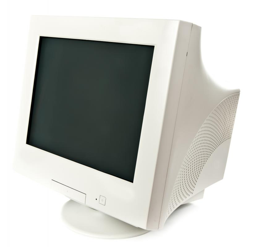

In [3]:
img = PILImage.create("Resources/crt.jpg")
img.thumbnail((255,255))
img

In [4]:
#!export
#loading learner
learn = load_learner('Resources/crtmodel.pkl')

In [5]:
%time learn.predict(img)

CPU times: user 273 ms, sys: 43.7 ms, total: 316 ms
Wall time: 95.2 ms


('CRT Monitor', TensorBase(0), TensorBase([9.9996e-01, 3.7130e-05]))

In [6]:
#!export
categories =("CRT")
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [7]:
classify_image(img)

{'C': 0.9999629259109497, 'R': 3.71302267012652e-05}

In [8]:
classify_image("Resources/lcd.jpg")

{'C': 0.00036979810101911426, 'R': 0.9996302127838135}

In [9]:
#!export
image = gr.inputs.Image(shape=(255,255))
label = gr.outputs.Label()

examples = ['Resources/crt.jpg','Resources/crt1.jpg','Resources/lcd.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/rishav/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/rishav/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/rishav/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/rishav/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f8dce957ac0>, 'http://127.0.0.1:7860/', None)

In [14]:
import notebook2script
notebook2script.convert_notebook("monitorClassifier.ipynb","app.py")